### Opinet - 셀프 주유소가 정말 저렴할까?

In [1]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

#### 1. Selenium으로 서울시 구별 주유소 가격정보 얻기

In [2]:
# Opinet 초기 화면 / 싼 주유소 찾기 / 지역별
url = 'https://www.opinet.co.kr/searRgSelect.do'
driver = webdriver.Chrome('C:/Users/YONSAI/Desktop/chromedriver_win32/chromedriver.exe')
driver.get(url)
time.sleep(2)

In [4]:
# 서울 자치구 리스트 가져오기
metro = driver.find_element(By.XPATH, '//*[@id="SIDO_NM0"]')    # 광역시도
metro.send_keys('서울')

In [5]:
# 서울 -> 시군구 리스트 가져오기
sigungu = driver.find_element(By.XPATH, '//*[@id="SIGUNGU_NM0"]')    # 시군구
gu_list = sigungu.find_elements(By.TAG_NAME, 'option')
gu_list[:3]

[<selenium.webdriver.remote.webelement.WebElement (session="c3e97df9559afdb7402b81382419c583", element="633803fa-a3af-4ff3-b946-478ff70e2d91")>,
 <selenium.webdriver.remote.webelement.WebElement (session="c3e97df9559afdb7402b81382419c583", element="801321f5-fc97-4d21-ad64-a0885d1f515a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="c3e97df9559afdb7402b81382419c583", element="96d41873-71f0-472f-9784-e7e7c0c3e013")>]

In [6]:
gu_list[1].text

'강남구'

In [7]:
gu_names = [gu.text for gu in gu_list[1:]]          # 시/군/구를 제외한 구 이름의 리스트
gu_names[:3]

['강남구', '강동구', '강북구']

In [8]:
# 강남구 선택
sigungu.send_keys(gu_names[0])

In [10]:
# 엑셀 저장
driver.find_element(By.ID, 'glopopd_excel').click()
time.sleep(2)

In [12]:
# 강남구를 제외한 나머지 자치구의 주유소 정보 엑셀 저장

for gu in gu_names[1:]:
    sigungu = driver.find_element(By.XPATH, '//*[@id="SIGUNGU_NM0"]')
    sigungu.send_keys(gu)
    time.sleep(2)
    driver.find_element(By.ID, 'glopopd_excel').click()
    time.sleep(2)

In [13]:
driver.close()

#### 2. 구별 휘발유 가격에 대한 정리

In [17]:
from glob import glob
glob('C:/Users/YONSAI/Downloads/지역*.xls')

['C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (1).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (10).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (11).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (12).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (13).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (14).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (15).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (16).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (17).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (18).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (19).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (2).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (20).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (21).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (22).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (3).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (4).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (5).xls',
 'C:/Users/YONSAI/Downloads\\지역_위치별(주유소) (6).xls',
 'C:/Users/YONSAI/

In [27]:
file = glob('C:/Users/YONSAI/Downloads/지역*.xls')[-1]
df = pd.read_excel(file, header=2)
df[df.셀프여부 == 'Y']

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1653,1575,-
1,서울특별시,자곡셀프주유소,서울 강남구 밤고개로 120 (자곡동),SK에너지,02-445-5841,Y,-,1699,1595,-
2,서울특별시,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),현대오일뱅크,02-529-5101,Y,1872,1699,1654,-
3,서울특별시,삼성동주유소,서울 강남구 테헤란로 619 (삼성동),현대오일뱅크,02-508-6572,Y,1929,1699,1609,-
4,서울특별시,현대오일뱅크(주)직영 산성셀프주유소,서울 강남구 헌릉로 730,현대오일뱅크,02-2226-4963,Y,1918,1699,1595,-
6,서울특별시,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),SK에너지,02-3462-5100,Y,1896,1714,1669,-
7,서울특별시,방죽주유소,서울 강남구 밤고개로 215 (율현동),GS칼텍스,02-459-3434,Y,-,1717,1639,-
8,서울특별시,SK서광주유소,서울 강남구 역삼로 142,SK에너지,02-562-4855,Y,1880,1725,1675,-
10,서울특별시,SK에너지(주) 매봉주유소,서울 강남구 언주로 307,SK에너지,02-556-5510,Y,1869,1749,1729,-
12,서울특별시,대교셀프주유소,서울 강남구 강남대로 640 (신사동),SK에너지,02-512-5521,Y,1930,1750,1680,-


In [40]:
# 25개 파일을 읽어서 하나의 데이터 프레임으로 만들기
df_list = []
for file in glob('C:/Users/YONSAI/Downloads/지역*.xls'):
    df = pd.read_excel(file, header=2)
    df_list.append(df)
df = pd.concat(df_list)
df.shape

(441, 10)

In [41]:
df = df[['상호', '주소', '휘발유', '셀프여부', '상표']]
df

,상호,주소,휘발유,셀프여부,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1679,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1684,N,현대오일뱅크
2,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1696,Y,GS칼텍스
3,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1696,N,GS칼텍스
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1699,Y,GS칼텍스
...,...,...,...,...,...
29,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2258,N,현대오일뱅크
30,갤러리아주유소,서울 강남구 압구정로 426,2275,N,SK에너지
31,SK논현주유소,서울 강남구 논현로 747 (논현동),2335,N,SK에너지
32,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2398,N,현대오일뱅크


In [43]:
df.rename(columns={'휘발유':'가격', '셀프여부':'셀프'}, inplace=True)
df.tail()

,상호,주소,가격,셀프,상표
29,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2258,N,현대오일뱅크
30,갤러리아주유소,서울 강남구 압구정로 426,2275,N,SK에너지
31,SK논현주유소,서울 강남구 논현로 747 (논현동),2335,N,SK에너지
32,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2398,N,현대오일뱅크
33,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578,N,GS칼텍스


In [44]:
df['구'] = df.주소.str.split().str[1]       # == df.주소.apply(lambda x: x.split()[1])
df.head()

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1679,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1684,N,현대오일뱅크,강동구
2,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1696,Y,GS칼텍스,강동구
3,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1696,N,GS칼텍스,강동구
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1699,Y,GS칼텍스,강동구


In [49]:
df.구.value_counts()

강남구     34
강서구     33
서초구     30
송파구     29
영등포구    27
양천구     24
성북구     23
구로구     20
동대문구    18
도봉구     16
성동구     16
은평구     16
노원구     14
서대문구    14
관악구     14
광진구     13
강동구     13
중랑구     13
강북구     12
용산구     12
금천구     11
마포구     11
중구      10
종로구      9
동작구      9
Name: 구, dtype: int64

In [50]:
# 가격을 정수로 변환
df.가격 = df.가격.astype(int)

In [51]:
df.to_csv('data/20230426서울시구별주유소.csv', index=False)

##### 3. 셀프주유소는 정말 저렴한지 비교

In [53]:
df.head()

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1679,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1684,N,현대오일뱅크,강동구
2,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1696,Y,GS칼텍스,강동구
3,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1696,N,GS칼텍스,강동구
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1699,Y,GS칼텍스,강동구


In [59]:
# 셀프/일반 주유소 가격 평균
df.groupby('셀프').describe()

가격                                                                  
    count         mean         std     min      25%     50%     75%     max
셀프                                                                         
N   180.0  1839.305556  222.341956  1604.0  1695.75  1738.5  1966.0  2690.0
Y   261.0  1686.049808   53.195154  1589.0  1649.00  1685.0  1706.0  2140.0

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

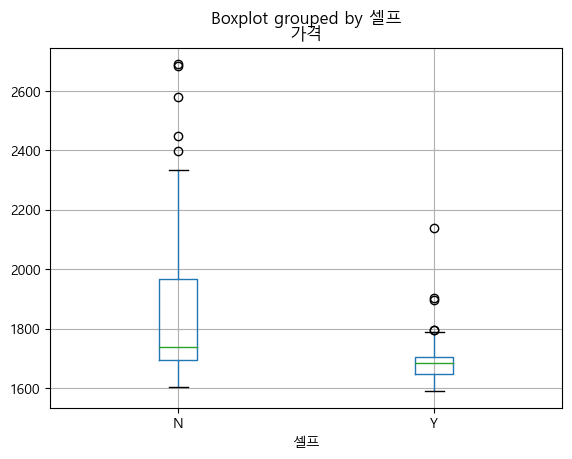

In [60]:
df.boxplot(column='가격', by='셀프')
plt.show()

- 가설검정(2-sample T)

In [66]:
import scipy as sp
sp.stats.ttest_ind(df[df.셀프 == 'Y'].가격, df[df.셀프 == 'N'].가격, equal_var=False)

Ttest_indResult(statistic=-9.070356664486171, pvalue=1.356940028604332e-16)

#### p-value가 0.05 보다 작으므로 귀무가설 기각, 즉 대립 가설 채택
       - 귀무가설(H0) : 셀프주유소와 일반주유소의 가격차이가 없다
       - 대립가설(H1 / Ha) : 셀프주유소와 일반주유소의 가격차이가 있다

- 상표별 가격 비교

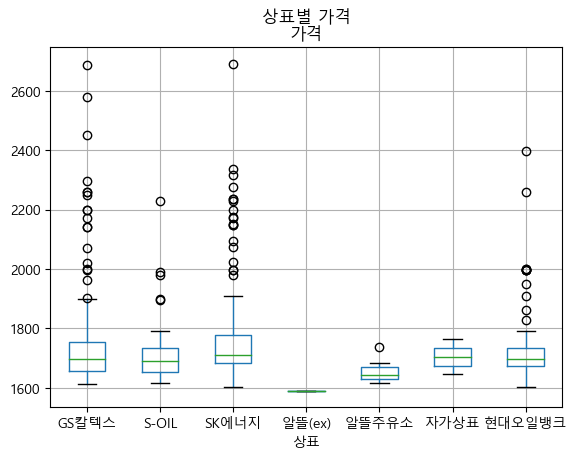

In [76]:
df.boxplot(column='가격', by='상표')
plt.suptitle('상표별 가격')
plt.show()

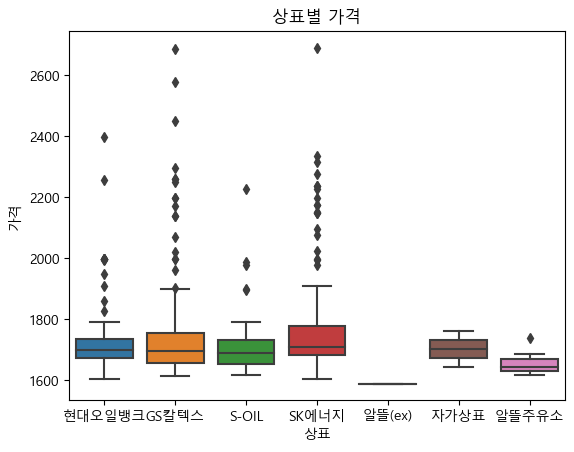

In [74]:
sns.boxplot(x='상표', y='가격', data=df)
plt.title('상표별 가격')
plt.show()

In [78]:
df.groupby('상표').describe()

가격                                                             \
        count         mean         std     min      25%     50%      75%   
상표                                                                         
GS칼텍스   105.0  1780.466667  215.825030  1614.0  1658.00  1696.0  1754.00   
S-OIL    79.0  1709.012658   93.021020  1618.0  1652.50  1689.0  1733.50   
SK에너지   130.0  1775.915385  186.074005  1604.0  1684.25  1709.0  1777.25   
알뜰(ex)    1.0  1589.000000         NaN  1589.0  1589.00  1589.0  1589.00   
알뜰주유소    10.0  1654.300000   36.444936  1618.0  1629.25  1643.0  1670.00   
자가상표      2.0  1704.000000   83.438600  1645.0  1674.50  1704.0  1733.50   
현대오일뱅크  114.0  1726.000000  118.179629  1604.0  1674.00  1698.0  1735.25   

                
           max  
상표              
GS칼텍스   2685.0  
S-OIL   2228.0  
SK에너지   2690.0  
알뜰(ex)  1589.0  
알뜰주유소   1738.0  
자가상표    1763.0  
현대오일뱅크  2398.0

- 구별로 가격비교

In [89]:
temp = df.groupby('구').describe()
temp.sort_values(by=('가격','mean'), ascending=False)

가격                                                                   
     count         mean         std     min      25%     50%      75%     max
구                                                                            
용산구   12.0  2148.250000  209.324943  1948.0  1998.00  2096.0  2237.00  2685.0
중구    10.0  2048.200000  340.329840  1659.0  1780.75  1954.0  2259.75  2690.0
종로구    9.0  1955.444444  243.553439  1669.0  1779.00  1790.0  2228.00  2260.0
강남구   34.0  1937.617647  252.871151  1653.0  1728.50  1797.0  2140.00  2578.0
성동구   16.0  1799.750000  173.326090  1645.0  1682.25  1717.5  1834.50  2170.0
강동구   13.0  1742.384615   84.125441  1679.0  1696.00  1725.0  1725.00  1978.0
관악구   14.0  1742.214286   53.391412  1685.0  1717.00  1725.5  1754.00  1862.0
서초구   30.0  1738.866667   74.890142  1589.0  1711.25  1725.0  1744.75  1989.0
구로구   20.0  1738.850000  134.413844  1645.0  1690.25  1697.0  1730.75  2259.0
동작구    9.0  1732.333333   54.728877  1649.0  1689.00  1749.0  1754.00  1835.0
영등포구  27.0  1724.666667  169.585921  1625.0  1625.00  1647.0  1694.00  2199.0
마포구   11.0  1708.090909   33.104243  1657.0  1687.00  1699.0  1718.50  1764.0
노원구   14.0  1706.571429   43.153954  1629.0  1677.50  1705.0  1738.00  1795.0
강서구   33.0  1705.606061   79.356765  1618.0  1649.00  1696.0  1718.00  2025.0
광진구   13.0  1699.923077   39.810931  1673.0  1674.00  1677.0  1695.00  1788.0
금천구   11.0  1693.818182   18.893481  1665.0  1685.00  1695.0  1695.00  1733.0
성북구   23.0  1692.478261   74.956272  1619.0  1649.00  1675.0  1691.50  1902.0
동대문구  18.0  1690.777778   39.417159  1635.0  1673.00  1688.5  1710.75  1790.0
송파구   29.0  1686.896552   50.241094  1633.0  1652.00  1688.0  1698.00  1878.0
양천구   24.0  1682.083333   38.392613  1625.0  1647.50  1697.0  1698.00  1779.0
서대문구  14.0  1681.928571   40.787374  1618.0  1650.00  1694.0  1714.75  1746.0
중랑구   13.0  1674.307692   20.596863  1645.0  1665.00  1667.0  1685.00  1719.0
도봉구   16.0  1666.812500   39.361942  1625.0  1632.50  1658.0  1693.50  1747.0
은평구   16.0  1648.500000   44.622864  1604.0  1617.75  1630.0  1677.00  1763.0
강북구   12.0  1645.916667   29.540291  1623.0  1625.00  1625.0  1673.50  1695.0